In [11]:
## Assignment - Perdict Customer Churn in the Telecom Industry

### Problem Statement:

# In the telecom industry, customers are able to choose from multiple service providers and actively switch from 
# one operator to another. In this highly competitive market, the telecommunications industry experiences
# an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer
# than to retain an existing one, customer retention has now become even more important than customer acquisition.

### Business Goal 

# For many incumbent operators, retaining high profitable customers is the number one business goal.

# To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

# In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to 
# identify customers at high risk of churn.

# The dataset contains customer-level information for a span of four consecutive months - June, July, August and September.
# The months are encoded as 6, 7, 8 and 9, respectively. 

# The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) 
# from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.
 
#**So interpretation is important!**

In [204]:
import pandas as pd
import numpy as np

In [205]:
# Read the Churn Data into a dataframe from tje CSV
telecom_churn = pd.read_csv("telecom_churn_data.csv")

In [206]:
telecom_churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [207]:
telecom_churn.shape

(99999, 226)

In [208]:
month_specific_cols = [col for col in telecom_churn.columns if '6' in col]
month_specific_cols_data = telecom_churn[month_specific_cols]
round((month_specific_cols_data.isnull().sum(axis=0)/month_specific_cols_data.shape[0])*100, 2)

last_date_of_month_6         0.00
arpu_6                       0.00
onnet_mou_6                  3.94
offnet_mou_6                 3.94
roam_ic_mou_6                3.94
roam_og_mou_6                3.94
loc_og_t2t_mou_6             3.94
loc_og_t2m_mou_6             3.94
loc_og_t2f_mou_6             3.94
loc_og_t2c_mou_6             3.94
loc_og_mou_6                 3.94
std_og_t2t_mou_6             3.94
std_og_t2m_mou_6             3.94
std_og_t2f_mou_6             3.94
std_og_t2c_mou_6             3.94
std_og_mou_6                 3.94
isd_og_mou_6                 3.94
spl_og_mou_6                 3.94
og_others_6                  3.94
total_og_mou_6               0.00
loc_ic_t2t_mou_6             3.94
loc_ic_t2m_mou_6             3.94
loc_ic_t2f_mou_6             3.94
loc_ic_mou_6                 3.94
std_ic_t2t_mou_6             3.94
std_ic_t2m_mou_6             3.94
std_ic_t2f_mou_6             3.94
std_ic_t2o_mou_6             3.94
std_ic_mou_6                 3.94
total_ic_mou_6

In [209]:
non_month_specific_cols = [col for col in telecom_churn.columns if '6' not in col and '7' not in col and '8' not in col and '9' not in col]
non_month_specific_cols_data = telecom_churn[non_month_specific_cols]
round((non_month_specific_cols_data.isnull().sum(axis=0)/non_month_specific_cols_data.shape[0])*100, 2)

mobile_number     0.00
circle_id         0.00
loc_og_t2o_mou    1.02
std_og_t2o_mou    1.02
loc_ic_t2o_mou    1.02
aon               0.00
aug_vbc_3g        0.00
jul_vbc_3g        0.00
jun_vbc_3g        0.00
sep_vbc_3g        0.00
dtype: float64

In [210]:
#we drop the columns that have 75% of the data missing.

cols_high_missing = ["date_of_last_rech_data_8","total_rech_data_8","max_rech_data_8","count_rech_2g_8", 
                     "count_rech_3g_8","av_rech_amt_data_8", "fb_user_8", "night_pck_user_8", "arpu_2g_8",
                     "arpu_3g_8",
                     "date_of_last_rech_data_9","total_rech_data_9",
                     "max_rech_data_9","count_rech_2g_9", "count_rech_3g_9","av_rech_amt_data_9",
                     "fb_user_9", "night_pck_user_9", "arpu_2g_9",
                     "arpu_3g_9",
                     "date_of_last_rech_data_6","total_rech_data_6","max_rech_data_6","count_rech_2g_6", 
                     "count_rech_3g_6","av_rech_amt_data_6","fb_user_6", "night_pck_user_6", "arpu_2g_6",
                     "arpu_3g_6",
                     "date_of_last_rech_data_7","total_rech_data_7","max_rech_data_7","count_rech_2g_7", 
                     "count_rech_3g_7","av_rech_amt_data_7", "fb_user_7", "night_pck_user_7", "arpu_2g_7",
                     "arpu_3g_7"]       

telecom_churn = telecom_churn.drop(columns=cols_high_missing, axis=1)

In [211]:
#We drop the data for all the remaining 
for missing_data_col in telecom_churn.columns[telecom_churn.isnull().any()]:
    telecom_churn = telecom_churn[~telecom_churn[missing_data_col].isnull()]

In [212]:
telecom_churn.shape

(84185, 186)

In [213]:
#Check for missing value columns again.

telecom_churn.columns[telecom_churn.isnull().any()]

Index([], dtype='object')

In [214]:
telecom_churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,5.90,0.00,14.84,15.01,26.83,104.23,423.28,188.04,0.00,0.00,0.00,0.00,1.83,0.00,0.0,0.00,0.00,0.00,0.00,0.00,4,9,11,5,74,384,283,121,44,154,65,50,6/29/2014,7/31/2014,8/28/2014,9/30/2014,44,23,30,0,0.0,108.07,365.47,0.0,0.0,0.0,0.0,0.00,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1006,0.0,0.0,0.00,0.0
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.0,135.54,45.76,0.48,60.66,67.41,67.66,64.81,4.34,26.49,

In [215]:
#Compute the average recharge amount.
# recharge_cols = [col for col in telecom_churn.columns if 'rech' in col]
# print(recharge_cols)
interested_columns = ["mobile_number", 
                      "total_rech_num_6","total_rech_amt_6", "max_rech_amt_6", "date_of_last_rech_6",
                      "max_rech_amt_7", "date_of_last_rech_7", "total_rech_num_7", "total_rech_amt_7"
                     ]
telecom_churn[interested_columns].sort_values(["total_rech_amt_6","total_rech_amt_7"],ascending=[0,0]).head()

,mobile_number,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,date_of_last_rech_6,max_rech_amt_7,date_of_last_rech_7,total_rech_num_7,total_rech_amt_7
38610,7001150960,29,35190,3100,6/25/2014,3100,7/30/2014,17,40335
33019,7002226643,9,18500,3000,6/27/2014,3000,7/22/2014,9,19000
51314,7000777972,43,17840,1119,6/30/2014,1050,7/31/2014,45,16725
67717,7002155380,71,13096,350,6/30/2014,3100,7/30/2014,26,19204
98208,7001719918,73,12795,300,6/30/2014,250,7/31/2014,47,7735


In [216]:
telecom_churn["avg_rech_first_2_months"] = (telecom_churn["total_rech_amt_6"] + telecom_churn["total_rech_amt_7"])/(telecom_churn["total_rech_num_6"]+telecom_churn["total_rech_num_7"])
# telecom_churn["avg_rech_first_2_months"].sort_values(["avg_rech_first_2_months"],ascending=[0]).head()

In [217]:
telecom_churn["avg_rech_first_2_months"].head()

1    35.230769
2    53.666667
3    25.714286
4    49.636364
5    30.000000
Name: avg_rech_first_2_months, dtype: float64

In [218]:
#Figure out the 70% quantile.
telecom_churn["avg_rech_first_2_months"].quantile(0.7)

57.0

In [219]:
telecom_churn_filtered =  telecom_churn[telecom_churn["avg_rech_first_2_months"] > 56.38751753155677]

In [220]:
telecom_churn_filtered.shape

(25673, 187)

In [221]:
telecom_churn_filtered[["total_ic_mou_9","total_og_mou_9","vol_2g_mb_9","vol_3g_mb_9"]].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
9,412.63,151.33,0.0,0.0
13,631.86,446.09,0.0,0.0
16,334.56,255.74,0.0,0.0
19,50.38,25.31,0.0,0.0
20,240.93,293.83,0.0,0.0


In [222]:
condition_list = [((telecom_churn_filtered["total_ic_mou_9"] == 0) & 
                   (telecom_churn_filtered["total_og_mou_9"] == 0) & 
                   (telecom_churn_filtered["vol_2g_mb_9"] == 0) &
                   (telecom_churn_filtered["vol_3g_mb_9"] == 0)),
                  ((telecom_churn_filtered["total_ic_mou_9"] !=0) | 
                   (telecom_churn_filtered["total_og_mou_9"] !=0) | 
                   (telecom_churn_filtered["vol_2g_mb_9"] !=0) |
                   (telecom_churn_filtered["vol_3g_mb_9"] !=0))
                 ]
choice_list = [1,0]
telecom_churn_filtered["churn"] = np.select(condition_list, choice_list)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [223]:
#Verify churn variable
telecom_churn_filtered[telecom_churn_filtered["churn"]==1][["total_ic_mou_9","total_og_mou_9","vol_2g_mb_9","vol_3g_mb_9"]].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
199,0.0,0.0,0.0,0.0
229,0.0,0.0,0.0,0.0
590,0.0,0.0,0.0,0.0
594,0.0,0.0,0.0,0.0
691,0.0,0.0,0.0,0.0


In [224]:
#Drop all the 9th month columns now
ninth_month_cols = [col for col in telecom_churn.columns if '_9' in col]
telecom_churn_final = telecom_churn_filtered.drop(columns=ninth_month_cols, axis=1)

In [225]:
telecom_churn_final.shape

(25673, 144)

In [226]:
telecom_churn_final.columns.to_series().groupby(telecom_churn_final.dtypes).groups

{dtype('int64'): Index(['mobile_number', 'circle_id', 'total_rech_num_6', 'total_rech_num_7',
        'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7',
        'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7',
        'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7',
        'last_day_rch_amt_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
        'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6',
        'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
        'sachet_3g_8', 'aon', 'churn'],
       dtype='object'),
 dtype('float64'): Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
        'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
        'offnet_mou_6',
        ...
        'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
        'vol_3g_mb_8', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g',
        'avg_rech_first_2_months'],
       dtype='object', length=110),
 dtyp

In [227]:
telecom_churn_final["last_date_of_month_6"] = pd.to_datetime(telecom_churn_final["last_date_of_month_6"])
telecom_churn_final["last_date_of_month_7"] = pd.to_datetime(telecom_churn_final["last_date_of_month_7"])
telecom_churn_final["last_date_of_month_8"] = pd.to_datetime(telecom_churn_final["last_date_of_month_8"])
telecom_churn_final["date_of_last_rech_6"] = pd.to_datetime(telecom_churn_final["date_of_last_rech_6"])
telecom_churn_final["date_of_last_rech_7"] = pd.to_datetime(telecom_churn_final["date_of_last_rech_7"])
telecom_churn_final["date_of_last_rech_8"] = pd.to_datetime(telecom_churn_final["date_of_last_rech_8"])

In [228]:
#3 new columns for days since recharge.
telecom_churn_final["days_since_recharge_6"] = telecom_churn_final["last_date_of_month_6"] - telecom_churn_final["date_of_last_rech_6"]
telecom_churn_final["days_since_recharge_7"] = telecom_churn_final["last_date_of_month_7"] - telecom_churn_final["date_of_last_rech_7"]
telecom_churn_final["days_since_recharge_8"] = telecom_churn_final["last_date_of_month_8"] - telecom_churn_final["date_of_last_rech_8"]

In [229]:
telecom_churn_final["days_since_recharge_6"] = telecom_churn_final["days_since_recharge_6"].dt.days
telecom_churn_final["days_since_recharge_7"] = telecom_churn_final["days_since_recharge_7"].dt.days
telecom_churn_final["days_since_recharge_8"] = telecom_churn_final["days_since_recharge_8"].dt.days

In [230]:
date_columns_to_be_dropped = ["last_date_of_month_6","last_date_of_month_7","last_date_of_month_8", 
                              "date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8"]
telecom_churn_final = telecom_churn_final.drop(columns=date_columns_to_be_dropped)

In [231]:
telecom_churn_final.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_first_2_months,churn,days_since_recharge_6,days_since_recharge_7,days_since_recharge_8
9,7001864400,109,0.0,0.0,0.0,119.518,247.435,170.231,33.89,30.11,22.43,63.48,54.16,78.34,0.00,0.00,0.00,0.00,0.00,0.00,33.89,30.11,22.43,38.03,40.06,34.93,0.00,0.00,0.00,0.0,0.00,0.00,71.93,70.18,57.36,0.00,0.00,0.00,25.45,14.09,43.41,0.00,0.00,0.00,0.0,0.0,0.0,25.45,14.09,43.41,0.0,0.00,0.00,0.66,0.00,0.00,0.0,0.0,0.0,98.04,84.28,100.78,129.34,124.34,49.93,132.94,96.24,122.58,0.40,0.00,0.00,262.69,220.59,172.51,0.30,0.00,0.00,32.86,78.21,1.74,0.00,0.00,0.00,0.0,0.0,0.0,33.16,78.21,1.74,303.98,327.31,219.86,0.00,0.0,0.0,8.11,28.49,45.59,0.00,0.00,0.00,4,2,5,220,195,210,110,154,50,110,154,30,0.00,7.37,0.00,0.0,0.0,0.00,0,1,0,0,0,0,0,0,0,0,0,0,902,0.00,0.00,0.00,0.0,69.166667,0,1,8,2
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.00,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.0,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.00,0.00,0.02,0.0,0.0,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.0,76.000000,0,10,9,1
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.00,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.00,0.00,0.00,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.00,0.00,0.00,3.26,5.91,0.0,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.00,2.18,0.0,0.0,0.0,87.99,151.73,82.44,364

In [232]:
telecom_churn_final["circle_id"].value_counts()

109    25673
Name: circle_id, dtype: int64

In [233]:
telecom_churn_remove_mob_circ = telecom_churn_final.drop(columns=["mobile_number","circle_id"])

In [234]:
#Drop all the columns that only have a 0.
for col in telecom_churn_remove_mob_circ.columns:
    if ((telecom_churn_remove_mob_circ[col].max()==0) & (telecom_churn_remove_mob_circ[col].min()==0)):
        print(col)

loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_ic_t2o_mou_6
std_ic_t2o_mou_7
std_ic_t2o_mou_8


In [235]:
cols_to_be_removed = ["loc_og_t2o_mou", "std_og_t2o_mou","loc_ic_t2o_mou",
                      "std_og_t2c_mou_6","std_og_t2c_mou_7","std_og_t2c_mou_8",
                      "std_ic_t2o_mou_6", "std_ic_t2o_mou_7", "std_ic_t2o_mou_8"]
telecom_churn_final = telecom_churn_remove_mob_circ.drop(columns=cols_to_be_removed)

In [236]:
churn_column = telecom_churn_final["churn"]
telecom_churn_final = telecom_churn_final.drop(columns=["churn"])
telecom_churn_final = ((telecom_churn_final-telecom_churn_final.mean())/telecom_churn_final.std())

In [237]:
telecom_churn_final = pd.concat([telecom_churn_final,churn_column], axis=1)

In [238]:
pd.options.display.max_columns = 4000
telecom_churn_final.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_first_2_months,days_since_recharge_6,days_since_recharge_7,days_since_recharge_8,churn
count,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,25673.000000
mean,-3.032248e-15,4.638983e-15,-3.478310e-15,-1.154339e-14,-6.343416e-15,-5.772438e-15,-2.276619e-14,-2.214380e-14,-2.325816e-14,-9.541981e-16,8.047679e-16,-1.242626e-15,-1.373426e-15,-2.824294e-16,-1.083991e-15,1.120124e-14,1.356046e-14,9.112134e-15,1.792931e-14,1.297171e-14,1.694692e-14,9.309174e-15,7.900046e-15,8.031635e-15,-8.076437e-16,1.737471e-15,7.914291e-16,-1.892337e-14,-1.819553e-14,-2.197267e-14,6.89

In [239]:
from sklearn.model_selection import train_test_split

In [240]:
# Divide the data to Train and Test
training_data, testing_data = train_test_split(telecom_churn_final, train_size=0.7, test_size=0.3)

In [241]:
Y_train = training_data["churn"]
training_data.pop("churn")

34329    0
14681    0
90128    0
29231    0
41529    0
62676    0
42425    0
87889    0
32555    0
19346    0
94000    0
88981    0
90301    0
4154     0
7398     0
62901    0
32459    0
15225    0
80906    0
62859    0
54431    0
22864    0
74544    0
70248    0
50384    0
693      0
97352    0
30326    0
60651    0
29943    0
        ..
18764    0
78403    0
15464    0
78559    0
65350    0
18926    0
26740    0
97084    0
97127    0
29346    0
43666    0
2261     0
9368     0
40681    0
34470    0
35988    0
25810    0
15936    0
87946    0
58138    0
93400    0
39       0
42482    0
23108    0
64380    0
6557     0
35709    0
92398    0
81440    0
71488    0
Name: churn, Length: 17971, dtype: int64

In [242]:
X_train = training_data

In [243]:
Y_train.head()

34329    0
14681    0
90128    0
29231    0
41529    0
Name: churn, dtype: int64

In [244]:
# Use PCA
pca = PCA(svd_solver="randomized", random_state=42)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [245]:
pca.components_

array([[ 1.64563084e-01,  1.67164344e-01,  1.58942116e-01, ...,
        -9.30744207e-02, -8.80632235e-02, -7.72234534e-02],
       [-1.77508870e-02, -2.70538381e-02, -1.58032426e-02, ...,
         4.58518754e-02,  4.33283845e-02,  5.29578503e-02],
       [ 1.13695016e-01,  1.26525973e-01,  1.19785388e-01, ...,
         7.73778138e-03, -1.00142447e-03, -9.50103370e-03],
       ...,
       [-2.84972066e-07,  2.67748706e-07,  4.43903077e-07, ...,
        -3.24141246e-10, -1.67492227e-08,  9.22330864e-09],
       [-1.03478509e-08,  3.18397946e-07,  4.07673059e-07, ...,
        -7.72821242e-09, -1.24470001e-08,  2.23408234e-09],
       [-4.59182115e-07,  2.79072947e-07, -7.98922302e-08, ...,
        -1.89691932e-08,  4.77391575e-09, -5.45374287e-08]])

In [246]:
pca.explained_variance_ratio_

array([1.25525780e-01, 8.76160211e-02, 5.66803731e-02, 4.54810650e-02,
       3.76964720e-02, 3.44272916e-02, 2.97094090e-02, 2.81863158e-02,
       2.69690998e-02, 2.51269445e-02, 2.21577092e-02, 2.06856391e-02,
       1.95381779e-02, 1.88343396e-02, 1.80353959e-02, 1.71672626e-02,
       1.41496445e-02, 1.34807679e-02, 1.25983840e-02, 1.20564591e-02,
       1.18616422e-02, 1.06560555e-02, 1.03560386e-02, 1.00387635e-02,
       9.57777588e-03, 9.39466364e-03, 9.29817330e-03, 8.79031709e-03,
       8.52461021e-03, 8.32199314e-03, 7.91313054e-03, 7.78519249e-03,
       7.68637838e-03, 7.54706762e-03, 6.95187825e-03, 6.77904273e-03,
       6.67281510e-03, 6.42208622e-03, 6.18949359e-03, 6.01436034e-03,
       5.95078280e-03, 5.73079494e-03, 5.60320355e-03, 5.45549644e-03,
       5.34298653e-03, 5.21170472e-03, 5.13760330e-03, 4.91204355e-03,
       4.82167272e-03, 4.51934001e-03, 4.41375874e-03, 4.36426305e-03,
       4.26614973e-03, 4.18477202e-03, 4.06928291e-03, 3.84240172e-03,
      

In [247]:
np.cumsum(pca.explained_variance_ratio_)

array([0.12552578, 0.2131418 , 0.26982217, 0.31530324, 0.35299971,
       0.387427  , 0.41713641, 0.44532273, 0.47229183, 0.49741877,
       0.51957648, 0.54026212, 0.5598003 , 0.57863464, 0.59667003,
       0.6138373 , 0.62798694, 0.64146771, 0.65406609, 0.66612255,
       0.67798419, 0.68864025, 0.69899629, 0.70903505, 0.71861283,
       0.72800749, 0.73730566, 0.74609598, 0.75462059, 0.76294258,
       0.77085572, 0.77864091, 0.78632729, 0.79387435, 0.80082623,
       0.80760527, 0.81427809, 0.82070018, 0.82688967, 0.83290403,
       0.83885481, 0.84458561, 0.85018881, 0.85564431, 0.86098729,
       0.866199  , 0.8713366 , 0.87624865, 0.88107032, 0.88558966,
       0.89000342, 0.89436768, 0.89863383, 0.9028186 , 0.90688789,
       0.91073029, 0.9145056 , 0.91809545, 0.92152179, 0.92492561,
       0.92820266, 0.93131619, 0.93420582, 0.93706247, 0.93981556,
       0.9425262 , 0.94520417, 0.94782453, 0.95039689, 0.95290163,
       0.95537134, 0.95777592, 0.96016366, 0.96252178, 0.96466

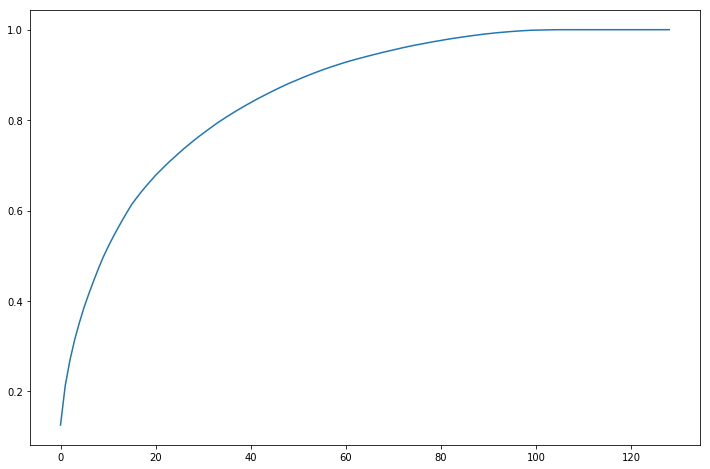

In [248]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [249]:
from sklearn.decomposition import IncrementalPCA

In [250]:
pca = IncrementalPCA(n_components=40)

In [251]:
X_train_pca = pca.fit_transform(X_train)

In [252]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
model_pca = logistic_regression.fit(X_train_pca,Y_train)

In [253]:
Y_test = testing_data["churn"]
testing_data.pop("churn")
X_test = testing_data

In [254]:
X_test_pca = pca.fit_transform(X_test)

In [255]:
Y_test_predict = model_pca.predict(X_test_pca)

In [256]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test_predict, Y_test)

0.9716956634640354